# Learning Python with the Ohmies Ω

The purpose of this notebook is to be a partially guided walkthrough of using python and some Messari tooling to see how we can improve our data gathering abilities!

## Setup

First lets do some global imports. If you don't have any of these repositories you should try running this in your terminal `pip install pandas` and `pip install copy`

In [12]:
import pandas as pd
import copy
import time

Now lets do some local imports from the messari library. To install these repositories you need to point pip to the github repository we host the code at. Try running this in your terminal `pip install git+https://github.com/messari/messari-python-api-private.git` You may have to restart your jupyter notebook to get this change to take effect, look under Kernel->Restart in the menu bar.

In [2]:
from messari.messari import Messari
from messari.blockexplorers import Etherscan
from messari.defillama import DeFiLlama

And lets set up the clients

In [3]:
MESSARI_API_KEY = 'api_key_here'
MESSARI_API_KEY = '70808c97-9ea3-4ea1-a297-39a8f9037457'
messari = Messari(MESSARI_API_KEY)

ETHERSCAN_API_KEY = 'api_key_here'
ETHERSCAN_API_KEY = 'DWC3QGAEHNFQQM55Z1AYTXUTZ1GPBK51JQ'
etherscan = Etherscan(ETHERSCAN_API_KEY)

SPECIAL CASE: Some people have run into some issues installing the messari library. This is the most universal way to brute force the install. In a new cell in this jupyter notebook run this as code.

`import sys
!{sys.executable} -m pip uninstall messari -y`

Then run this:

`import sys
!{sys.executable} -m pip install git+https://github.com/messari/messari-python-api-private.git`

TLDR this runs install commands directly from this notebook and installs what you need into this specific enviornment. If you open a new jupyter notebook and want to use the messari library, you'll likely have to do this again. This only needs to be done once per notebook to set up the library, once you've run this code in a notebook you won't have to run it again. This is not how I recomend installing the messari library but in the interest of time I'm confident this will fix most of your problems. If you want to try and wrangle through these issues on your specific computer and install the messari library the right way, hit me up and we can do a screen share sesh at another time

## Initial Research

Before we can get to the fun part and start coding, we need to do some equally run researching! Go out and see if you can find the two ethereum addresses for the Olympus DAO treasuries. Once you have them, assign them below

In [4]:
ohm_treasury_v1 = 'address_here'
ohm_treasury_v2 = 'address_here'

ohm_treasury_v1 = '0x886CE997aa9ee4F8c2282E182aB72A705762399D'
ohm_treasury_v2 = '0x31F8Cc382c9898b273eff4e0b7626a6987C846E8'

## Extracting data from Ethereum

Now that you found the Ethereum addresses of the Olympus DAO treasury, we want to get a better understanding of the token transfers that have occured in and out of the treasury. 

Go into the [blockexplorer documentation](https://github.com/messari/messari-python-api-private/blob/master/examples/notebooks/Etherscan%20API%20Tutorial.ipynb) in the Messari Python library to find the fuction that returns this information

Forgive the hardcoding here but the pagination of Etherscan was throwing me off

In [5]:
# Write your code here

page1 = etherscan.get_account_token_transfers(ohm_treasury_v2)[ohm_treasury_v2]
last_block = int(page1.iloc[-1]['blockNumber']) +1

page2 = etherscan.get_account_token_transfers(ohm_treasury_v2, start_block=last_block)[ohm_treasury_v2]

In [6]:
ohm_tt = pd.concat([page1, page2])
ohm_tt.set_index('blockNumber', inplace=True)
ohm_tt.sort_index(inplace=True)
ohm_tt

,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
blockNumber,,,,,,,,,,,,,,,,,,
12530585,1622308869,0xe23900ee9134d155c0f95fca6d138f6d9c98af90c5c3...,180,0xe95c5b64dfff5a71da13d0cb65482b5c5180b91a7595...,0x763a641383007870ae96067818f1649e5586f6de,0x6b175474e89094c44da98b954eedeac495271d0f,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,100902874505316627468,Dai Stablecoin,DAI,18,118,52000,35000000000,36842,10284871,deprecated,1778971
12532291,1622331523,0x017e4e5c991c8b4c64d301dadfea23767f158eb4bec4...,82,0x82268c3bfa5717bab0d6dae3d20d9a1b5d6044d86d8a...,0x245cc372c84b3645bf0ffe6538620b04a217988b,0x6b175474e89094c44da98b954eedeac495271d0f,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,3370301121609949806617922,Dai Stablecoin,DAI,18,9,104311,150000000000,53880,1106645,deprecated,1777265
12532321,1622331943,0xac796de8729b03f91deea94fb8894eae68a20dc11520...,83,0x444f3c52ecd962310a2e2688191104300e79d12cc476...,0x245cc372c84b3645bf0ffe6538620b04a217988b,0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,11750000000000000000,SushiSwap LP Token,SLP,18,104,121344,140000000000,85646,2947481,deprecated,1777235
12550991,1622582422,0x209e41c3f0aafed7cef0601e26b00a789dc200c44176...,127,0xf1ca1628e8d4f5df27abfcf8b796f7eb7b4f000a1548...,0xd03056323b7a63e2095ae97fa1ad92e4820ff045,0x6b175474e89094c44da98b954eedeac495271d0f,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,4500000000000000000000,Dai Stablecoin,DAI,18,39,343458,36800000000,303658,2854017,deprecated,1758565
12550997,1622582526,0xc2ce59ad653a0984a297331aa97193cbd474b84d746d...,128,0xcf6991463b8b36c8d172c5fac7620416b5aff7411ae7...,0xd03056323b7a63e2095ae97fa1ad92e4820ff045,0x6b175474e89094c44da98b954eedeac495271d0f,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,4500000000000000000000,Dai Stablecoin,DAI,18,196,218677,36800000000,178877,12621888,deprecated,1758559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14304301,1646179718,0xdf1dfa78b8abca2b4ec8af0c400f8bbdcfe82f17b195...,134,0x0355ab12dd4a4f7dcebb20f76ad8ea67adc89d33c46f...,0x737119790f6e0f85451ab200759f8efa144dcd43,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,185000000000000000,Wrapped Ether,WETH,18,95,293511,72338077495,264011,7449431,deprecated,5255
14304301,1646179718,0xdf1dfa78b8abca2b4ec8af0c400f8bbdcfe82f17b195...,134,0x0355ab12dd4a4f7dcebb20f76ad8ea67adc89d33c46f...,0x737119790f6e0f85451ab200759f8efa144dcd43,0xc0d4ceb216b3ba9c3701b291766fdcba977cec3a,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,2427293046,BTRFLY,BTRFLY,9,95,293511,72338077495,264011,7449431,deprecated,5255
14307166,1646218715,0x18a7577339ea4b31c91d837fd3e7dac46aee6a06b9b0...,1484,0x6f564d64e7c1a54bd7fc45b5e1c256f545261ca2df2d...,0xfd7bda47cbeeed93c897273585f666f8d1cc8d45,0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0,0x31f8cc382c9898b273eff4e0b7626a6987c846e8,16219582006215130916,Frax Share,FXS,18,35,420836,36650684700,391336,2995793,deprecated,2390


## Extract list of token names from OHM token transfers

Using the DataFrame with all of the Olympus treasury token transfers, can you print a list of the tokens held by the Olympus treasury?

The list should not have any repeats and you should try to do this without using any for loops

In [8]:
# Write your code here

token_names = list(set(ohm_tt['tokenSymbol']))
print(token_names)

['ANGLE', 'SYN', 'FRAX', 'ALCX', 'FOX', 'CAVE', 'USF', 'SUSHI', 'stkAAVE', 'INV', 'CNV', 'DAI', 'MTA', 'SPELL', 'DIVINE', 'POOL', 'THOR', 'xSDT', 'FLOAT', 'ROOK', 'CRV', 'BPT', 'FDT', 'FXS', 'GRO', 'BOND', 'RUNE', 'LUSD', 'PENDLE', 'ICHI', 'BTRFLY', 'UNI-V2', 'GEL', 'XRUNE', 'xSUSHI', 'SLP', 'CVX', 'KP3R', 'BANK', 'IQ', 'QUARTZ', 'WETH', 'D2D', 'PREMIA', 'BOTTO', 'DISCO']


# Getting running totals

In this step you are going to have to bear with me and trust the process. Now that we have a list of all tokens transfers to the ohm treasury we need to turn this into a running list of the treasury balance over time. This list should look a little something like this.

`list = [{timeStamp: 10, sushi: 0, dai: 0}, {timeStamp: 11, sushi: 24, dai: 0}, {timeStamp: 12, sushi: 24, dai: 4}]`

The above list is just the concept, the real list should include all the tokens, and the timestamps will not be sequential

In [22]:
# Write your code here

token_dict = {}
for token_name in token_names:
    token_dict[token_name] = 0

totals_list = []
for idx, row in ohm_tt.iterrows():
    symbol = row['tokenSymbol']
    decimals = int(row['tokenDecimal'])
    amount = int(row['value']) / (10 ** decimals)
    
    # Big brain check for withdrawals
    if row['from'] == ohm_treasury_v2.lower():
        amount = amount * -1
        
    token_dict['blockNumber'] = idx
    token_dict['timeStamp'] = row['timeStamp']
    token_dict[symbol] += amount
    dict_copy = copy.deepcopy(token_dict)
    totals_list.append(dict_copy)

Now that we have our list of dictionaries, we can easily turn it into a dataframe.

In [14]:
# Write your code here

# Create DataFrame with list
ohm_treasury = pd.DataFrame(totals_list)

# Set the index to 'timeStamp'
ohm_treasury.set_index('timeStamp', inplace=True)

# Convert the index to a datetime
ohm_treasury.index = pd.to_datetime(ohm_treasury.index, unit='s')

# Replace the index with just the date of the index
ohm_treasury.index = ohm_treasury.index.date

# Filter the DataFrame to just have the last entry of each date
ohm_treasury = ohm_treasury[~ohm_treasury.index.duplicated(keep='last')]
ohm_treasury

,ANGLE,SYN,FRAX,ALCX,FOX,CAVE,USF,SUSHI,stkAAVE,INV,...,KP3R,BANK,IQ,QUARTZ,WETH,D2D,PREMIA,BOTTO,DISCO,blockNumber
2021-05-29,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,12532321
2021-06-01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,12551691
2021-06-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,12558162
2021-06-03,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,12564447
2021-06-04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,12570102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,14624.968985,30917.240463,3.725290e-09,361.537452,178354.717543,1.567750e+07,10917.045801,0.0,37.473244,83.026140,...,5.684342e-14,312919.568939,3.862180e+06,1883.016288,15.877781,500000.0,2495.365151,10404.248204,1.978840e+13,14283729
2022-02-27,14624.968985,30917.240463,3.725290e-09,361.537452,178354.717543,1.567750e+07,10917.045801,0.0,37.473244,84.616671,...,5.684342e-14,312919.568939,3.862180e+06,1883.016288,16.054514,500000.0,2495.365151,10404.248204,1.978840e+13,14287674
2022-02-28,14624.968985,30917.240463,3.725290e-09,361.537452,178354.717543,1.567750e+07,10917.045801,0.0,37.473244,86.207411,...,5.684342e-14,312919.568939,3.862180e+06,1883.016288,16.342141,500000.0,2495.365151,10404.248204,1.978840e+13,14297724
2022-03-01,14624.968985,30917.240463,3.725290e-09,361.537452,178354.717543,1.567750e+07,10917.045801,0.0,37.473244,87.797935,...,5.684342e-14,312919.568939,3.862180e+06,1883.016288,16.342141,500000.0,2495.365151,10404.248204,1.978840e+13,14300415


## Pull Price data from Messari's API

Now we need to get the most recent price for each asset in the OHM treasury. However you chose to do this, the output should look like this:

`{DAI: 1, SUSHI: 3.4, FXS: 23.2, ......}`

In [23]:
# Write your code here to pull the most recent price for the list of assets
# you created in the previous step
messari_supported = []
for token_name in token_names:
    time.sleep(1)
    try:
        messari.get_metric_timeseries(token_name, 'price')
        messari_supported.append(token_name)
    except:
        print(f'{token_name} price not supported by messari')
        
# Get prices from the messari api, turn into dictionary
prices = messari.get_metric_timeseries(messari_supported, 'price')
prices = prices.xs('close', axis=1, level=1)
prices_dict = prices.iloc[-1].to_dict()

FOX price not supported by messari


CAVE price not supported by messari
stkAAVE price not supported by messari


INV price not supported by messari
CNV price not supported by messari
xSDT price not supported by messari


BPT price not supported by messari


RUNE price not supported by messari
UNI-V2 price not supported by messari


BANK price not supported by messari


QUARTZ price not supported by messari
DISCO price not supported by messari


Now, can you use the prices in the dictionary you made to create a new dataframe where the tokens are scaled by the most recent price?

In [20]:
prices_df = pd.DataFrame()
for price in prices_dict:
    prices_df[f'{price}'] = ohm_treasury[price] * prices_dict[price]
prices_df.tail()

,ANGLE,SYN,FRAX,ALCX,USF,SUSHI,DAI,MTA,SPELL,DIVINE,...,XRUNE,xSUSHI,SLP,CVX,KP3R,IQ,WETH,D2D,PREMIA,BOTTO
2022-02-26,3146.960194,NaN,3.714442e-09,50936.138584,2394.516236,0.0,17919.622692,9707.215451,31308.002957,3230.42862,...,11671.785447,-1.247360e-10,0.628159,22187.747048,3.865703e-11,35379.448835,47239.095648,135588.528393,3920.771645,NaN
2022-02-27,3146.960194,NaN,3.714442e-09,50936.138584,2394.516236,0.0,17919.622692,9707.215451,31308.002957,3230.42862,...,11671.785447,-1.247360e-10,0.628159,22187.747048,3.865703e-11,35379.448835,47764.907556,135588.528393,3920.771645,NaN
2022-02-28,3146.960194,NaN,3.714442e-09,50936.138584,2394.516236,0.0,17919.622692,9707.215451,31308.002957,3230.42862,...,11671.785447,-1.247360e-10,0.628159,22187.747048,3.865703e-11,35379.448835,48620.643944,135588.528393,3920.771645,NaN
2022-03-01,3146.960194,NaN,3.714442e-09,50936.138584,2394.516236,0.0,17919.622692,9707.215451,31308.002957,3230.42862,...,11671.785447,-1.247360e-10,0.628159,22187.747048,3.865703e-11,35379.448835,48620.643944,135588.528393,3920.771645,NaN
2022-03-02,3146.960194,NaN,3.714442e-09,50936.138584,2394.516236,0.0,17919.622692,9707.215451,31308.002957,3230.42862,...,11671.785447,-1.247360e-10,0.628159,22187.747048,3.865703e-11,35379.448835,49171.050367,135588.528393,3920.771645,NaN


# Charting ♥

Lastly plot a line chart of the results

<AxesSubplot:>

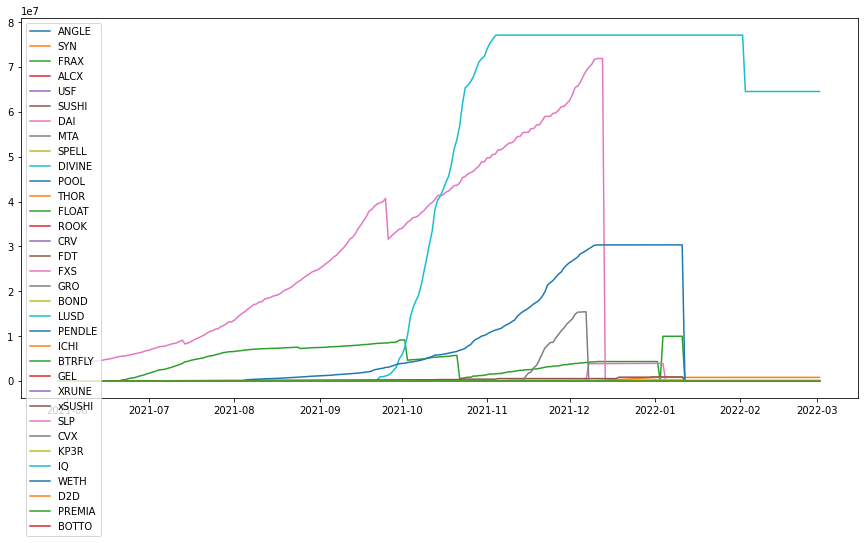

In [21]:
prices_df.plot(figsize=(15,7))

Once you have the chart you should do some exploring. Can you find some other sources to confirm the accuracry of what you've plotted? 